## Test Sumativo: Agrupaciones y Predicciones - MCD - Análisis de datos en Python
Tarea calificada • 2 h
Desarrollo Cuestionario • Tomás Barrientos • 27-11-2023

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### Usaremos la información de los resultados de la liga española para ver algunos ejemplos de predicción 

In [62]:
laliga2122 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga21 22.xlsx', )
laliga2021 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga20 21.xlsx', )
laliga1920 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga19 20.xlsx', )
laliga1819 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga18 19.xlsx', )
laliga1718 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga17 18.xlsx', )
laliga1617 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga16 17.xlsx', )

In [63]:
# Assuming laliga2122, laliga2021, laliga1920, laliga1819, laliga1718, laliga1617 are your DataFrames

# List of DataFrames
dataframes = [df.dropna(how='all') for df in [laliga2122, laliga2021, laliga1920, laliga1819, laliga1718, laliga1617]]

# Concatenate DataFrames
laliga = pd.concat(dataframes, ignore_index=True)

# Select specific columns
laliga = laliga.loc[:, ['Wk', 'Date', 'Local', 'Score', 'Visitante', 'Attendance']]

# Reset index
laliga.reset_index(drop=True, inplace=True)

# Multiply 'Attendance' column by 1000
laliga['Attendance'] *= 1000

In [64]:
def golesvisita(marcador):
    goles = marcador.split('–')
    return int(goles[1])
def goleslocal(marcador):
    goles = marcador.split('–')
    return int(goles[0])

def torneo(año,mes):
    if ((año==2016) & (mes<=12)|(año==2017) & (mes<8)):
        return '16/17'
    elif ((año==2017) & (mes<=12)|(año==2018) & (mes<8)):
        return '17/18'
    elif ((año==2018) & (mes<=12)|(año==2019) & (mes<8)):
        return '18/19'
    elif ((año==2019) & (mes<=12)|(año==2020) & (mes<9)):
        return '19/20'
    elif ((año==2020) & (mes<=12)|(año==2021) & (mes<8)):
        return '20/21'
    elif ((año==2021) & (mes<=12)|(año==2022) & (mes<8)):
        return '21/22'

def resultado(string):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return 'Local'
    if int(goles[0])<int(goles[1]):
        return 'Visitante'
    else: 
        return 'Empate'
    
def resultado_equipo(string, local, visita):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return local
    if int(goles[0])<int(goles[1]):
        return visita
    else: 
        return 'Empate'
    

laliga['Goles Local'] = laliga['Score'].apply(goleslocal)
laliga['Goles Visitante'] = laliga['Score'].apply(golesvisita)
laliga['Total goles partido']= laliga['Goles Local']+laliga['Goles Visitante']
laliga['Año'] = laliga['Date'].dt.year
laliga['Mes'] = laliga['Date'].dt.month
laliga['Temporada'] = laliga.apply(lambda x: torneo(x['Año'],x['Mes']),axis = 1)
laliga['Resultado'] = laliga['Score'].apply(resultado)
laliga['Ganador'] = laliga.apply(lambda x: resultado_equipo(x['Score'],x['Local'],x['Visitante']),axis=1)

In [65]:
laliga

,Wk,Date,Local,Score,Visitante,Attendance,Goles Local,Goles Visitante,Total goles partido,Año,Mes,Temporada,Resultado,Ganador
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,1,0,1,2021,8,21/22,Local,Valencia
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,1,1,2,2021,8,21/22,Empate,Empate
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,1,1,2,2021,8,21/22,Empate,Empate
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,0,0,0,2021,8,21/22,Empate,Empate
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,1,4,5,2021,8,21/22,Visitante,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,38.0,2017-05-21,Valencia,1–3,Villarreal,33587.0,1,3,4,2017,5,16/17,Visitante,Villarreal
2276,38.0,2017-05-21,Atlético Madrid,3–1,Athletic Club,52314.0,3,1,4,2017,5,16/17,Local,Atlético Madrid
2277,38.0,2017-05-21,Celta Vigo,2–2,Real Sociedad,14188.0,2,2,4,2017,5,16/17,Empate,Empate
2278,38.0,2017-05-21,Barcelona,4–2,Eibar,74932.0,4,2,6,2017,5,16/17,Local,Barcelona


In [66]:
laliga[['Local']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Local   2280 non-null   object
dtypes: object(1)
memory usage: 17.9+ KB


## Pregunta 1
Si se hace una agrupación de los equipos que alguna vez estuvieron en primera división con K=4 grupos, y considerando solamente las siguientes variables para ello: puntos totales y asistencia de local, ¿cuál de las siguientes alternativas indica la cantidad de equipos que son clasificados junto al Sevilla (cuenta sin incluir al Sevilla)?    

In [75]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Suponiendo que laliga es tu DataFrame

# 1. Filtra las variables relevantes
dfp1 = laliga[['Local', 'Attendance', 'Total goles partido']]

# 2. Agrupa por equipo y calcula puntos totales y asistencia total
grouped_df = dfp1.groupby('Local').agg({'Attendance': 'sum', 'Total goles partido': 'sum'}).reset_index()

# 3. Crea un nuevo DataFrame con puntos totales y asistencia total
X = grouped_df[['Attendance', 'Total goles partido']]

# 4. Normaliza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Usa KMeans con K=4 en los datos normalizados
kmeans = KMeans(n_clusters=4, random_state=42)
grouped_df['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Encuentra el grupo al que pertenece el equipo "Sevilla" y cuenta equipos en ese grupo (excluyendo a Sevilla)
sevilla_cluster = grouped_df.loc[grouped_df['Local'] == 'Sevilla', 'Cluster'].values[0]
equipos_en_mismo_grupo = grouped_df.loc[grouped_df['Cluster'] == sevilla_cluster]

# Excluye a Sevilla del recuento
cantidad_equipos = len(equipos_en_mismo_grupo) - 1

print(f"La cantidad de equipos clasificados junto con Sevilla es: {cantidad_equipos}")


La cantidad de equipos clasificados junto con Sevilla es: 6


In [68]:
grouped_df

,Local,Attendance,Total goles partido,Cluster
0,Alavés,1470820.0,245,0
1,Athletic Club,3417075.0,264,1
2,Atlético Madrid,4834556.0,274,2
3,Barcelona,6272438.0,401,2
4,Betis,3847810.0,328,1
5,Celta Vigo,1385598.0,326,1
6,Cádiz,267049.0,90,3
7,Eibar,374501.0,230,0
8,Elche,300678.0,86,3
9,Espanyol,1735163.0,228,0


Representación grafica de los datos 

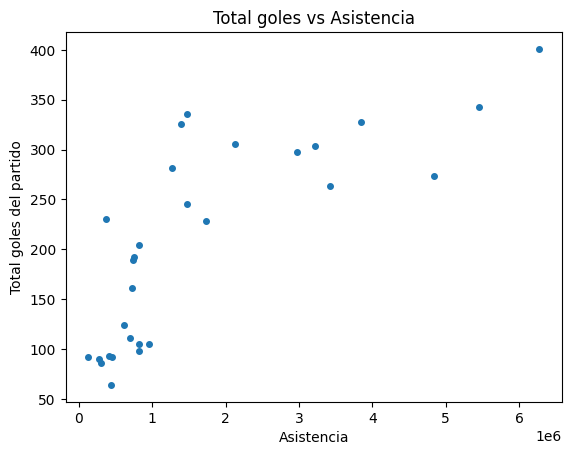

In [69]:
x1 = grouped_df['Attendance'].values
y1 = grouped_df['Total goles partido'].values
plt.ylabel('Total goles del partido')
plt.xlabel('Asistencia')
plt.title('Total goles vs Asistencia')
plt.plot(x1,y1,'o',markersize=4)

## Pregunta 2
Utilizando el resultado de la Pregunta 1 (la etiqueta de los equipos), ¿cuál de las siguientes alternativas corresponde a la cantidad de equipos que hay en el clúster que quedó con menos y con más equipos respectivamente? 

In [76]:
# Suponiendo que grouped_df es el DataFrame resultante de la Pregunta 1

# Obtén la cantidad de equipos en cada clúster
cantidad_equipos_por_cluster = grouped_df['Cluster'].value_counts()

# Encuentra el clúster con menos equipos
cluster_menos_equipos = cantidad_equipos_por_cluster.idxmin()
equipos_en_cluster_menos = cantidad_equipos_por_cluster.min()

# Encuentra el clúster con más equipos
cluster_mas_equipos = cantidad_equipos_por_cluster.idxmax()
equipos_en_cluster_mas = cantidad_equipos_por_cluster.max()

print(f"La cantidad de equipos en el clúster con menos equipos es {equipos_en_cluster_menos}.")
print(f"La cantidad de equipos en el clúster con más equipos es {equipos_en_cluster_mas}.")

La cantidad de equipos en el clúster con menos equipos es 3.
La cantidad de equipos en el clúster con más equipos es 11.


## Pregunta 3
Si se hace una regresión multivariada para predecir la asistencia al estadio en función de goles del equipo local y la cantidad de empates en ese estadio, ocupando la información de las 6 temporadas, asumiendo que cada equipo siempre ha jugado de local en su estadio, eliminando los registros sin información y utilizando el 80% de los registros para entrenamiento, ¿cuál de las siguientes alternativas corresponde al código para calcular el coeficiente R2 de esta regresión redondeado a dos decimales? 

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Suponiendo que laliga es tu DataFrame con la información de las 6 temporadas

# Filtrar columnas relevantes y eliminar registros sin información
dfp2 = laliga[['Attendance', 'Goles Local', 'Resultado']]

# Eliminar registros con información faltante
dfp2 = dfp2.dropna()

# Convertir la columna 'Resultado' a una variable binaria indicando si hubo empate o no
dfp2['Empate'] = dfp2['Resultado'] == 'Empate'

# Definir variables independientes (X) y la variable dependiente (y)
X = dfp2[['Goles Local', 'Empate']]
y = dfp2['Attendance']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de regresión lineal y entrenarlo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

# Imprimir el resultado redondeado a dos decimales
print(f"El coeficiente R^2 de la regresión es: {round(r2, 2)}")


El coeficiente R^2 de la regresión es: 0.03


## Pregunta 4
Asumiendo que la cantidad de goles que convertirá un equipo se predice como la cantidad de goles que ese equipo convirtió en la fecha justo anterior (sin importar si fue local o visita), ¿cuál de las siguientes alternativas corresponde al promedio del error absoluto entre la cantidad de goles totales y la cantidad de goles pronosticados para un partido, considerando todos los partidos desde la fecha 2 a la última de la temporada 21/22?

In [84]:
import pandas as pd
import numpy as np

# Suponiendo que laliga es tu DataFrame

# Filtra datos desde la fecha 2 a la última de la temporada 21/22
df_filtrado = laliga[(laliga['Mes'] >= 2) & (laliga['Temporada'] == '21/22')]

# Añade la columna de goles anteriores para el equipo local y visitante
df_filtrado['Goles Anteriores Local'] = df_filtrado.groupby('Local')['Goles Local'].shift(1)
df_filtrado['Goles Anteriores Visitante'] = df_filtrado.groupby('Visitante')['Goles Visitante'].shift(1)

# Rellena los NaN resultantes con 0, ya que no hay información para la primera fecha de cada equipo
df_filtrado[['Goles Anteriores Local', 'Goles Anteriores Visitante']] = df_filtrado[[
    'Goles Anteriores Local', 'Goles Anteriores Visitante']].fillna(0)

# Calcula el promedio del error absoluto
promedio_error_absoluto = np.abs(df_filtrado['Total goles partido'] - (
        df_filtrado['Goles Anteriores Local'] + df_filtrado['Goles Anteriores Visitante'])).mean()

# Redondea el resultado a dos decimales
promedio_error_absoluto = round(promedio_error_absoluto, 2)

print(f"El promedio del error absoluto es: {promedio_error_absoluto}")


El promedio del error absoluto es: 1.86


## Pregunta 5
Asuma que la cantidad de goles que convertirá un equipo se predice como la cantidad de goles que ese equipo convirtió en la fecha justo anterior (sin importar si fue local o visita). Utilice este pronóstico para predecir si el partido lo ganó el equipo Local, Vista o fue Empate. Defina como indicador de la calidad de esta predicción el acierto a este resultado con un 0 si se acertó el resultado y con un 1 si no. Bajo lo anterior, ¿cuál de las siguientes alternativas corresponde al promedio de aciertos de este método de predicción, considerando todos los partidos desde la fecha 2 a la última de la temporada 21/22? 

In [85]:
import pandas as pd
import numpy as np

# Suponiendo que laliga es tu DataFrame original

# Filtra datos desde la fecha 2 a la última de la temporada 21/22
df_filtrado2 = laliga[(laliga['Mes'] >= 2) & (laliga['Temporada'] == '21/22')]

# Añade la columna de goles anteriores para el equipo local y visitante
df_filtrado2['Goles Anteriores Local'] = df_filtrado2.groupby('Local')['Goles Local'].shift(1)
df_filtrado2['Goles Anteriores Visitante'] = df_filtrado2.groupby('Visitante')['Goles Visitante'].shift(1)

# Rellena los NaN resultantes con 0, ya que no hay información para la primera fecha de cada equipo
df_filtrado2[['Goles Anteriores Local', 'Goles Anteriores Visitante']] = df_filtrado2[[
    'Goles Anteriores Local', 'Goles Anteriores Visitante']].fillna(0)

# Predice el resultado del partido según la cantidad de goles anteriores
df_filtrado2['Resultado Predicho'] = np.where(
    df_filtrado2['Goles Anteriores Local'] > df_filtrado2['Goles Anteriores Visitante'], 'Local',
    np.where(df_filtrado2['Goles Anteriores Local'] < df_filtrado2['Goles Anteriores Visitante'], 'Visitante', 'Empate')
)

# Añade una columna de aciertos (0 si acertó, 1 si no acertó)
df_filtrado2['Acierto'] = np.where(df_filtrado2['Resultado'] == df_filtrado2['Resultado Predicho'], 0, 1)

# Calcula el promedio de aciertos
promedio_aciertos = df_filtrado2['Acierto'].mean()

print(f"El promedio de aciertos es: {promedio_aciertos}")


El promedio de aciertos es: 0.6115942028985507


## Pregunta 6
Utilizando los resultados obtenidos en la Pregunta 5, ¿cuál de las siguientes alternativas corresponde a la cantidad de partidos que tuvieron como predicción del resultado un empate? 

In [86]:
# Suponiendo que 'resultados_predichos' es el DataFrame resultante de la Pregunta 5

# Filtra los partidos con predicción de empate
partidos_empate = resultados_predichos[resultados_predichos['Resultado predicho'] == 'Empate']

# Cuenta la cantidad de partidos de empate
cantidad_empates = len(partidos_empate)

print(f"La cantidad de partidos con predicción de empate es: {cantidad_empates}")



NameError: name 'resultados_predichos' is not defined

### Comencemos mirando un ejemplo para los partidos del Real Madrid con el Barcelona

In [ ]:
rm_bar = laliga[((laliga['Local']=='Real Madrid')&(laliga['Visitante']=='Barcelona')|
        ((laliga['Local']=='Barcelona')&(laliga['Visitante']=='Real Madrid')))].reset_index(drop=True)

In [ ]:
rm_bar

,Wk,Date,Local,Score,Visitante,Attendance,Goles Local,Goles Visitante,Total goles partido,Año,Mes,Temporada,Resultado,Ganador
0,10.0,2021-10-24,Barcelona,1–2,Real Madrid,86422.0,1,2,3,2021,10,21/22,Visitante,Real Madrid
1,29.0,2022-03-20,Real Madrid,0–4,Barcelona,60017.0,0,4,4,2022,3,21/22,Visitante,Barcelona
2,7.0,2020-10-24,Barcelona,1–3,Real Madrid,NaN,1,3,4,2020,10,20/21,Visitante,Real Madrid
3,30.0,2021-04-10,Real Madrid,2–1,Barcelona,NaN,2,1,3,2021,4,20/21,Local,Real Madrid
4,10.0,2019-12-18,Barcelona,0–0,Real Madrid,93426.0,0,0,0,2019,12,19/20,Empate,Empate
5,26.0,2020-03-01,Real Madrid,2–0,Barcelona,78357.0,2,0,2,2020,3,19/20,Local,Real Madrid
6,10.0,2018-10-28,Barcelona,5–1,Real Madrid,93265.0,5,1,6,2018,10,18/19,Local,Barcelona
7,26.0,2019-03-02,Real Madrid,0–1,Barcelona,78921.0,0,1,1,2019,3,18/19,Visitante,Barcelona
8,17.0,2017-12-23,Real Madrid,0–3,Barcelona,80264.0,0,3,3,2017,12,17/18,Visitante,Barcelona
9,36.0,2018-05-06,Barcelona,2–2,Real Madrid,97939.0,2,2,4,2018,5,17/18,Empate,Empate


In [ ]:
rm_bar[['Temporada','Date','Local','Score','Visitante','Año']]

,Temporada,Date,Local,Score,Visitante,Año
0,21/22,2021-10-24,Barcelona,1–2,Real Madrid,2021
1,21/22,2022-03-20,Real Madrid,0–4,Barcelona,2022
2,20/21,2020-10-24,Barcelona,1–3,Real Madrid,2020
3,20/21,2021-04-10,Real Madrid,2–1,Barcelona,2021
4,19/20,2019-12-18,Barcelona,0–0,Real Madrid,2019
5,19/20,2020-03-01,Real Madrid,2–0,Barcelona,2020
6,18/19,2018-10-28,Barcelona,5–1,Real Madrid,2018
7,18/19,2019-03-02,Real Madrid,0–1,Barcelona,2019
8,17/18,2017-12-23,Real Madrid,0–3,Barcelona,2017
9,17/18,2018-05-06,Barcelona,2–2,Real Madrid,2018


### Usaremos la información de todos los torneos para entender patrones de comportamiento de los resultados históricos entre estos dos equipos


In [ ]:
rm_bar[rm_bar['Año']!=2022]

,Wk,Date,Local,Score,Visitante,Attendance,Goles Local,Goles Visitante,Total goles partido,Año,Mes,Temporada,Resultado,Ganador
0,10.0,2021-10-24,Barcelona,1–2,Real Madrid,86422.0,1,2,3,2021,10,21/22,Visitante,Real Madrid
2,7.0,2020-10-24,Barcelona,1–3,Real Madrid,NaN,1,3,4,2020,10,20/21,Visitante,Real Madrid
3,30.0,2021-04-10,Real Madrid,2–1,Barcelona,NaN,2,1,3,2021,4,20/21,Local,Real Madrid
4,10.0,2019-12-18,Barcelona,0–0,Real Madrid,93426.0,0,0,0,2019,12,19/20,Empate,Empate
5,26.0,2020-03-01,Real Madrid,2–0,Barcelona,78357.0,2,0,2,2020,3,19/20,Local,Real Madrid
6,10.0,2018-10-28,Barcelona,5–1,Real Madrid,93265.0,5,1,6,2018,10,18/19,Local,Barcelona
7,26.0,2019-03-02,Real Madrid,0–1,Barcelona,78921.0,0,1,1,2019,3,18/19,Visitante,Barcelona
8,17.0,2017-12-23,Real Madrid,0–3,Barcelona,80264.0,0,3,3,2017,12,17/18,Visitante,Barcelona
9,36.0,2018-05-06,Barcelona,2–2,Real Madrid,97939.0,2,2,4,2018,5,17/18,Empate,Empate
10,14.0,2016-12-03,Barcelona,1–1,Real Madrid,98485.0,1,1,2,2016,12,16/17,Empate,Empate


### Usaremos la media de goles históricos de cada equipo como predictor de los goles del próximo partido

In [ ]:
test1 = rm_bar.groupby('Local')['Goles Local'].mean().reset_index()
test1 = test1.rename(columns={"Local": "Equipo", 'Goles Local': 'Goles promedio de local'})

test2 = rm_bar.groupby('Visitante')['Goles Visitante'].mean().reset_index()
test2 = test2.rename(columns = {'Goles Visitante': 'Goles promedio de visitante'})

result = pd.concat([test1, test2], axis=1)
dt = result.drop(['Visitante'], axis=1)
dt['Goles promedio'] = np.round((dt['Goles promedio de local']+dt['Goles promedio de visitante'])/2)
dt['Goles promedio de local'] = np.round(dt['Goles promedio de local'])
dt['Goles promedio de visitante'] = np.round(dt['Goles promedio de visitante'])
dt

,Equipo,Goles promedio de local,Goles promedio de visitante,Goles promedio
0,Barcelona,2.0,2.0,2.0
1,Real Madrid,1.0,2.0,1.0


### Con esta función crearemos las columnas con la predicción

In [ ]:
def nuevo_resultado(rm_bar,goles):
    goles_rm = goles.loc[1,'Goles promedio']
    goles_bar = goles.loc[0,'Goles promedio']

    for i in range(len(rm_bar)):
        if rm_bar.iloc[i]['Local']=='Real Madrid':
            rm_bar.loc[i,'Resultado 2']= str(int(goles_rm))+":"+str(int(goles_bar))
            rm_bar.loc[i,'Goles Local 2']= int(goles_rm)
            rm_bar.loc[i,'Goles Visitante 2'] = int(goles_bar)
            rm_bar.loc[i,'Total goles partido 2'] = rm_bar.loc[i,'Goles Local 2']+ rm_bar.loc[i,'Goles Visitante 2']
        else:
            rm_bar.loc[i,'Resultado 2']= str(int(goles_bar))+":"+str(int(goles_rm))
            rm_bar.loc[i,'Goles Local 2']= int(goles_bar)
            rm_bar.loc[i,'Goles Visitante 2'] = int(goles_rm)
            rm_bar.loc[i,'Total goles partido 2'] = rm_bar.loc[i,'Goles Local 2']+ rm_bar.loc[i,'Goles Visitante 2']
    return rm_bar            

In [ ]:
mostrar = nuevo_resultado(rm_bar,dt)
mostrar.sort_values('Date',ascending=False)[['Temporada','Date','Local','Score','Visitante','Año','Resultado 2','Goles Local 2','Goles Visitante 2','Total goles partido 2']]

,Temporada,Date,Local,Score,Visitante,Año,Resultado 2,Goles Local 2,Goles Visitante 2,Total goles partido 2
1,21/22,2022-03-20,Real Madrid,0–4,Barcelona,2022,1:2,1.0,2.0,3.0
0,21/22,2021-10-24,Barcelona,1–2,Real Madrid,2021,2:1,2.0,1.0,3.0
3,20/21,2021-04-10,Real Madrid,2–1,Barcelona,2021,1:2,1.0,2.0,3.0
2,20/21,2020-10-24,Barcelona,1–3,Real Madrid,2020,2:1,2.0,1.0,3.0
5,19/20,2020-03-01,Real Madrid,2–0,Barcelona,2020,1:2,1.0,2.0,3.0
4,19/20,2019-12-18,Barcelona,0–0,Real Madrid,2019,2:1,2.0,1.0,3.0
7,18/19,2019-03-02,Real Madrid,0–1,Barcelona,2019,1:2,1.0,2.0,3.0
6,18/19,2018-10-28,Barcelona,5–1,Real Madrid,2018,2:1,2.0,1.0,3.0
9,17/18,2018-05-06,Barcelona,2–2,Real Madrid,2018,2:1,2.0,1.0,3.0
8,17/18,2017-12-23,Real Madrid,0–3,Barcelona,2017,1:2,1.0,2.0,3.0


### Vemos la "calidad" de nuestra predicción calculando el error absoluto para cada predicción realizada


In [ ]:
mostrar['Error absoluto'] = np.abs(mostrar['Total goles partido']-mostrar['Total goles partido 2'])
mostrar.sort_values('Date',ascending=False)[['Temporada','Date','Local','Score','Visitante','Año','Resultado 2','Goles Local 2','Goles Visitante 2','Total goles partido 2','Error absoluto']]

,Temporada,Date,Local,Score,Visitante,Año,Resultado 2,Goles Local 2,Goles Visitante 2,Total goles partido 2,Error absoluto
1,21/22,2022-03-20,Real Madrid,0–4,Barcelona,2022,1:2,1.0,2.0,3.0,1.0
0,21/22,2021-10-24,Barcelona,1–2,Real Madrid,2021,2:1,2.0,1.0,3.0,0.0
3,20/21,2021-04-10,Real Madrid,2–1,Barcelona,2021,1:2,1.0,2.0,3.0,0.0
2,20/21,2020-10-24,Barcelona,1–3,Real Madrid,2020,2:1,2.0,1.0,3.0,1.0
5,19/20,2020-03-01,Real Madrid,2–0,Barcelona,2020,1:2,1.0,2.0,3.0,1.0
4,19/20,2019-12-18,Barcelona,0–0,Real Madrid,2019,2:1,2.0,1.0,3.0,3.0
7,18/19,2019-03-02,Real Madrid,0–1,Barcelona,2019,1:2,1.0,2.0,3.0,2.0
6,18/19,2018-10-28,Barcelona,5–1,Real Madrid,2018,2:1,2.0,1.0,3.0,3.0
9,17/18,2018-05-06,Barcelona,2–2,Real Madrid,2018,2:1,2.0,1.0,3.0,1.0
8,17/18,2017-12-23,Real Madrid,0–3,Barcelona,2017,1:2,1.0,2.0,3.0,0.0


In [ ]:
round(mostrar['Error absoluto'].mean(),2)

1.25

### Replicaremos el método, considerando solamente los goles totales, sin condición de local o visita, para todos los partidos de la temporada 21/22 

In [ ]:
laligasin2122 = laliga[laliga['Temporada']!='21/22']
laligasin2122.sort_values('Temporada',ascending=False)[['Temporada','Date','Local','Score','Visitante','Año']]

,Temporada,Date,Local,Score,Visitante,Año
380,20/21,2020-09-12,Eibar,0–0,Celta Vigo,2020
631,20/21,2021-03-06,Cádiz,1–0,Eibar,2021
640,20/21,2021-03-13,Alavés,1–1,Cádiz,2021
639,20/21,2021-03-12,Levante,1–0,Valencia,2021
638,20/21,2021-03-10,Atlético Madrid,2–1,Athletic Club,2021
...,...,...,...,...,...,...
2024,16/17,2016-11-26,Sevilla,2–1,Valencia,2016
2023,16/17,2016-11-26,Espanyol,3–0,Leganés,2016
2022,16/17,2016-11-26,Real Madrid,2–1,Sporting Gijón,2016
2021,16/17,2016-11-26,Málaga,4–3,La Coruña,2016


In [ ]:
test1_l = laligasin2122.groupby('Local')['Goles Local'].mean().reset_index()
test1_l = test1_l.rename(columns={"Local": "Equipo", 'Goles Local': 'Goles promedio de local'})

test2_l = laligasin2122.groupby('Visitante')['Goles Visitante'].mean().reset_index()
test2_l = test2_l.rename(columns = {'Goles Visitante': 'Goles promedio de visitante'})

result_l = pd.concat([test1_l, test2_l], axis=1)
dt_l = result_l.drop(['Visitante'], axis=1)
dt_l['Goles promedio'] = np.round((dt_l['Goles promedio de local'] + dt_l['Goles promedio de visitante'])/2)
dt_l['Goles promedio de local'] = np.round(dt_l['Goles promedio de local'])
dt_l['Goles promedio de visitante'] = np.round(dt_l['Goles promedio de visitante'])
dt_l

,Equipo,Goles promedio de local,Goles promedio de visitante,Goles promedio
0,Alavés,1.0,1.0,1.0
1,Athletic Club,1.0,1.0,1.0
2,Atlético Madrid,2.0,1.0,2.0
3,Barcelona,3.0,2.0,3.0
4,Betis,2.0,1.0,1.0
5,Celta Vigo,2.0,1.0,1.0
6,Cádiz,1.0,1.0,1.0
7,Eibar,1.0,1.0,1.0
8,Elche,1.0,1.0,1.0
9,Espanyol,1.0,1.0,1.0


In [ ]:
def nuevo_resultado_laliga(goles,laliga):
    laliga2 = laliga.copy()
    for i in range(len(laliga2)):
        local = laliga2.iloc[i]['Local']
        visitante = laliga2.iloc[i]['Visitante']
        index_loc = goles[goles['Equipo']==local].index.values.astype(int)[0]
        index_vis = goles[goles['Equipo']==visitante].index.values.astype(int)[0]
        goles_loc = goles.loc[index_loc,'Goles promedio']
        goles_vis = goles.loc[index_vis,'Goles promedio']
        if laliga2.iloc[i]['Local']== local:
            laliga2.loc[i,'Resultado P1']= str(int(goles_loc))+":"+str(int(goles_vis))
            laliga2.loc[i,'Goles Local P1']= int(goles_loc)
            laliga2.loc[i,'Goles Visitante P1'] = int(goles_vis)
            laliga2.loc[i,'Total goles partido P1'] = laliga2.loc[i,'Goles Local P1'] + laliga2.loc[i,'Goles Visitante P1']
    return laliga2

In [ ]:
laliga2 = nuevo_resultado_laliga(dt_l,laliga)
laliga2.sort_values('Temporada',ascending=False)[['Temporada','Date','Local','Score','Visitante','Año','Resultado P1','Goles Local P1','Goles Visitante P1','Total goles partido P1']]

,Temporada,Date,Local,Score,Visitante,Año,Resultado P1,Goles Local P1,Goles Visitante P1,Total goles partido P1
0,21/22,2021-08-13,Valencia,1–0,Getafe,2021,1:1,1.0,1.0,2.0
251,21/22,2022-02-26,Rayo Vallecano,0–1,Real Madrid,2022,1:2,1.0,2.0,3.0
260,21/22,2022-03-05,Osasuna,1–0,Villarreal,2022,1:2,1.0,2.0,3.0
259,21/22,2022-03-04,Alavés,0–0,Sevilla,2022,1:2,1.0,2.0,3.0
258,21/22,2022-03-02,Mallorca,0–2,Real Sociedad,2022,1:2,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2024,16/17,2016-11-26,Sevilla,2–1,Valencia,2016,2:1,2.0,1.0,3.0
2023,16/17,2016-11-26,Espanyol,3–0,Leganés,2016,1:1,1.0,1.0,2.0
2022,16/17,2016-11-26,Real Madrid,2–1,Sporting Gijón,2016,2:1,2.0,1.0,3.0
2021,16/17,2016-11-26,Málaga,4–3,La Coruña,2016,1:1,1.0,1.0,2.0


### y calculamos el error absoluto

In [ ]:
CalcularError2122 = laliga2[laliga2['Temporada']=='21/22']
CalcularError2122.sort_values('Temporada',ascending=False)[['Temporada','Date','Local','Score','Visitante','Año','Resultado P1','Goles Local P1','Goles Visitante P1','Total goles partido P1']]

,Temporada,Date,Local,Score,Visitante,Año,Resultado P1,Goles Local P1,Goles Visitante P1,Total goles partido P1
0,21/22,2021-08-13,Valencia,1–0,Getafe,2021,1:1,1.0,1.0,2.0
250,21/22,2022-02-26,Getafe,2–2,Alavés,2022,1:1,1.0,1.0,2.0
259,21/22,2022-03-04,Alavés,0–0,Sevilla,2022,1:2,1.0,2.0,3.0
258,21/22,2022-03-02,Mallorca,0–2,Real Sociedad,2022,1:2,1.0,2.0,3.0
257,21/22,2022-02-28,Granada,0–0,Cádiz,2022,1:1,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
124,21/22,2021-11-07,Mallorca,2–2,Elche,2021,1:1,1.0,1.0,2.0
123,21/22,2021-11-07,Osasuna,0–2,Real Sociedad,2021,1:2,1.0,2.0,3.0
122,21/22,2021-11-07,Valencia,3–3,Atlético Madrid,2021,1:2,1.0,2.0,3.0
121,21/22,2021-11-07,Villarreal,1–0,Getafe,2021,2:1,2.0,1.0,3.0


In [ ]:
CalcularError2122['Error absoluto P1'] = np.abs(CalcularError2122['Total goles partido']-CalcularError2122['Total goles partido P1'])

In [ ]:
CalcularError2122.sort_values('Temporada',ascending=False)[['Temporada','Date','Local','Score','Visitante','Año','Resultado P1','Goles Local P1','Goles Visitante P1','Total goles partido P1','Error absoluto P1']]

,Temporada,Date,Local,Score,Visitante,Año,Resultado P1,Goles Local P1,Goles Visitante P1,Total goles partido P1,Error absoluto P1
0,21/22,2021-08-13,Valencia,1–0,Getafe,2021,1:1,1.0,1.0,2.0,1.0
250,21/22,2022-02-26,Getafe,2–2,Alavés,2022,1:1,1.0,1.0,2.0,2.0
259,21/22,2022-03-04,Alavés,0–0,Sevilla,2022,1:2,1.0,2.0,3.0,3.0
258,21/22,2022-03-02,Mallorca,0–2,Real Sociedad,2022,1:2,1.0,2.0,3.0,1.0
257,21/22,2022-02-28,Granada,0–0,Cádiz,2022,1:1,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
124,21/22,2021-11-07,Mallorca,2–2,Elche,2021,1:1,1.0,1.0,2.0,2.0
123,21/22,2021-11-07,Osasuna,0–2,Real Sociedad,2021,1:2,1.0,2.0,3.0,1.0
122,21/22,2021-11-07,Valencia,3–3,Atlético Madrid,2021,1:2,1.0,2.0,3.0,3.0
121,21/22,2021-11-07,Villarreal,1–0,Getafe,2021,2:1,2.0,1.0,3.0,2.0


In [ ]:
round(CalcularError2122['Error absoluto P1'].mean(),2)

1.46

### Ahora utilizamos los goles de local y de visita, para ver si nuestra predicción es mejor que la anterior

In [ ]:
def nuevo_resultado_laliga2(goles,laliga):
    laliga3 = laliga.copy()
    for i in range(len(laliga2)):
        local = laliga2.iloc[i]['Local']
        visitante = laliga2.iloc[i]['Visitante']
        index_loc = goles[goles['Equipo']==local].index.values.astype(int)[0]
        index_vis = goles[goles['Equipo']==visitante].index.values.astype(int)[0]
        goles_loc = goles.loc[index_loc,'Goles promedio de local']
        goles_vis = goles.loc[index_vis,'Goles promedio de visitante']
        if laliga2.iloc[i]['Local']== local:
            laliga2.loc[i,'Resultado P2']= str(int(goles_loc))+":"+str(int(goles_vis))
            laliga2.loc[i,'Goles Local P2']= int(goles_loc)
            laliga2.loc[i,'Goles Visitante P2'] = int(goles_vis)
            laliga2.loc[i,'Total goles partido P2'] = laliga2.loc[i,'Goles Local P2']+ laliga2.loc[i,'Goles Visitante P2']
    return laliga2

In [ ]:
laliga3 = nuevo_resultado_laliga2(dt_l,laliga)

In [ ]:
laliga3

,Wk,Date,Local,Score,Visitante,Attendance,Goles Local,Goles Visitante,Total goles partido,Año,...,Resultado,Ganador,Resultado P1,Goles Local P1,Goles Visitante P1,Total goles partido P1,Resultado P2,Goles Local P2,Goles Visitante P2,Total goles partido P2
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,1,0,1,2021,...,Local,Valencia,1:1,1.0,1.0,2.0,2:1,2.0,1.0,3.0
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,1,1,2,2021,...,Empate,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,1,1,2,2021,...,Empate,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,0,0,0,2021,...,Empate,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,1,4,5,2021,...,Visitante,Real Madrid,1:2,1.0,2.0,3.0,1:2,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,38.0,2017-05-21,Valencia,1–3,Villarreal,33587.0,1,3,4,2017,...,Visitante,Villarreal,1:2,1.0,2.0,3.0,2:1,2.0,1.0,3.0
2276,38.0,2017-05-21,Atlético Madrid,3–1,Athletic Club,52314.0,3,1,4,2017,...,Local,Atlético Madrid,2:1,2.0,1.0,3.0,2:1,2.0,1.0,3.0
2277,38.0,2017-05-21,Celta Vigo,2–2,Real Sociedad,14188.0,2,2,4,2017,...,Empate,Empate,1:2,1.0,2.0,3.0,2:1,2.0,1.0,3.0
2278,38.0,2017-05-21,Barcelona,4–2,Eibar,74932.0,4,2,6,2017,...,Local,Barcelona,3:1,3.0,1.0,4.0,3:1,3.0,1.0,4.0


In [ ]:
CalcularError2122_V2 = laliga3[laliga3['Temporada']=='21/22']
CalcularError2122_V2

,Wk,Date,Local,Score,Visitante,Attendance,Goles Local,Goles Visitante,Total goles partido,Año,...,Resultado,Ganador,Resultado P1,Goles Local P1,Goles Visitante P1,Total goles partido P1,Resultado P2,Goles Local P2,Goles Visitante P2,Total goles partido P2
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,1,0,1,2021,...,Local,Valencia,1:1,1.0,1.0,2.0,2:1,2.0,1.0,3.0
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,1,1,2,2021,...,Empate,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,1,1,2,2021,...,Empate,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,0,0,0,2021,...,Empate,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,1,4,5,2021,...,Visitante,Real Madrid,1:2,1.0,2.0,3.0,1:2,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,38.0,2022-05-22,Alavés,0–1,Cádiz,11138.0,0,1,1,2022,...,Visitante,Cádiz,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0
376,38.0,2022-05-22,Granada,0–0,Espanyol,17951.0,0,0,0,2022,...,Empate,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0
377,38.0,2022-05-22,Real Sociedad,1–2,Atlético Madrid,23586.0,1,2,3,2022,...,Visitante,Atlético Madrid,2:2,2.0,2.0,4.0,2:1,2.0,1.0,3.0
378,38.0,2022-05-22,Barcelona,0–2,Villarreal,54850.0,0,2,2,2022,...,Visitante,Villarreal,3:2,3.0,2.0,5.0,3:1,3.0,1.0,4.0


In [ ]:
CalcularError2122_V2['Error absoluto'] = np.abs(CalcularError2122_V2['Total goles partido']-CalcularError2122_V2['Total goles partido P2'])

In [ ]:
CalcularError2122_V2

,Wk,Date,Local,Score,Visitante,Attendance,Goles Local,Goles Visitante,Total goles partido,Año,...,Ganador,Resultado P1,Goles Local P1,Goles Visitante P1,Total goles partido P1,Resultado P2,Goles Local P2,Goles Visitante P2,Total goles partido P2,Error absoluto
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,1,0,1,2021,...,Valencia,1:1,1.0,1.0,2.0,2:1,2.0,1.0,3.0,2.0
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,1,1,2,2021,...,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0,0.0
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,1,1,2,2021,...,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0,0.0
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,0,0,0,2021,...,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0,2.0
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,1,4,5,2021,...,Real Madrid,1:2,1.0,2.0,3.0,1:2,1.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,38.0,2022-05-22,Alavés,0–1,Cádiz,11138.0,0,1,1,2022,...,Cádiz,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0,1.0
376,38.0,2022-05-22,Granada,0–0,Espanyol,17951.0,0,0,0,2022,...,Empate,1:1,1.0,1.0,2.0,1:1,1.0,1.0,2.0,2.0
377,38.0,2022-05-22,Real Sociedad,1–2,Atlético Madrid,23586.0,1,2,3,2022,...,Atlético Madrid,2:2,2.0,2.0,4.0,2:1,2.0,1.0,3.0,0.0
378,38.0,2022-05-22,Barcelona,0–2,Villarreal,54850.0,0,2,2,2022,...,Villarreal,3:2,3.0,2.0,5.0,3:1,3.0,1.0,4.0,2.0


In [ ]:
CalcularError2122_V2['Error absoluto'].mean()

1.3921052631578947

### ¿Y si utilizamos una regresión? ¿Y si pensamos que el resultado de un partido depende de los puntos totales con los que llega cada equipo al enfrentamiento?

In [ ]:
def puntos_local(data,temporada,fecha,equipo):
    data_usar = data[((data['Wk']<fecha)&(data['Temporada']==temporada)&((data['Local']==equipo)|(data['Visitante']==equipo)))]
    puntos = 0
    for i in range(len(data_usar)):
        ganador = str(data_usar.iloc[i]['Ganador'])
        if ganador == equipo:
            puntos += 3
        if ganador == 'Empate':
            puntos +=1
    return puntos

def puntos_visita(data,temporada,fecha,equipo):
    data_usar = data[((data['Wk']<fecha)&(data['Temporada']==temporada)&((data['Local']==equipo)|(data['Visitante']==equipo)))]
    puntos = 0
    for i in range(len(data_usar)):
        ganador = str(data_usar.iloc[i]['Ganador'])
        if ganador == equipo:
            puntos += 3
        if ganador == 'Empate':
            puntos +=1
    return puntos

In [ ]:
temporadas = laliga['Temporada'].unique().tolist()
for temporada in temporadas:
    laliga['Puntos local f-1'] = laliga.apply(lambda x: puntos_local(laliga,temporada,x['Wk'],x['Local']),axis=1)
    laliga['Puntos visita f-1'] = laliga.apply(lambda x: puntos_local(laliga,temporada,x['Wk'],x['Visitante']),axis=1)

In [ ]:
rm_bar2 = laliga[((laliga['Local']=='Real Madrid')&(laliga['Visitante']=='Barcelona')|
        ((laliga['Local']=='Barcelona')&(laliga['Visitante']=='Real Madrid')))].reset_index(drop=True)

In [ ]:
rm_bar2

,Wk,Date,Local,Score,Visitante,Attendance,Goles Local,Goles Visitante,Total goles partido,Año,Mes,Temporada,Resultado,Ganador,Puntos local f-1,Puntos visita f-1
0,10.0,2021-10-24,Barcelona,1–2,Real Madrid,86422.0,1,2,3,2021,10,21/22,Visitante,Real Madrid,19,21
1,29.0,2022-03-20,Real Madrid,0–4,Barcelona,60017.0,0,4,4,2022,3,21/22,Visitante,Barcelona,68,63
2,7.0,2020-10-24,Barcelona,1–3,Real Madrid,NaN,1,3,4,2020,10,20/21,Visitante,Real Madrid,13,14
3,30.0,2021-04-10,Real Madrid,2–1,Barcelona,NaN,2,1,3,2021,4,20/21,Local,Real Madrid,71,66
4,10.0,2019-12-18,Barcelona,0–0,Real Madrid,93426.0,0,0,0,2019,12,19/20,Empate,Empate,19,21
5,26.0,2020-03-01,Real Madrid,2–0,Barcelona,78357.0,2,0,2,2020,3,19/20,Local,Real Madrid,59,57
6,10.0,2018-10-28,Barcelona,5–1,Real Madrid,93265.0,5,1,6,2018,10,18/19,Local,Barcelona,19,21
7,26.0,2019-03-02,Real Madrid,0–1,Barcelona,78921.0,0,1,1,2019,3,18/19,Visitante,Barcelona,59,57
8,17.0,2017-12-23,Real Madrid,0–3,Barcelona,80264.0,0,3,3,2017,12,17/18,Visitante,Barcelona,37,34
9,36.0,2018-05-06,Barcelona,2–2,Real Madrid,97939.0,2,2,4,2018,5,17/18,Empate,Empate,81,84


In [ ]:
X1 = rm_bar2[['Puntos local f-1','Puntos visita f-1']]
Y1 = rm_bar2['Goles Local']

X2 = rm_bar2[['Puntos local f-1','Puntos visita f-1']]
Y2 = rm_bar2['Goles Visitante']

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2)
linear_model1 = LinearRegression(normalize=True).fit(x_train1, y_train1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2)
linear_model2 = LinearRegression(normalize=True).fit(x_train2, y_train2)

print('Training score: ', linear_model1.score(x_train1, y_train1))
print('Training score: ', linear_model2.score(x_train2, y_train2))

Training score:  0.07039611304092963
Training score:  0.03772687722103574


In [ ]:
predictors1 = x_train1.columns
coef1 = pd.Series(linear_model1.coef_, predictors1).sort_values()
coef1

Puntos local f-1    -0.307173
Puntos visita f-1    0.340577
dtype: float64

In [ ]:
predictors2 = x_train2.columns
coef2 = pd.Series(linear_model2.coef_, predictors2).sort_values()
coef2

Puntos local f-1    -0.004642
Puntos visita f-1   -0.003989
dtype: float64

In [ ]:
print(f'El intercepto del modelo 1 es {linear_model1.intercept_}')
print(f'El intercepto del modelo 2 es {linear_model2.intercept_}')

El intercepto del modelo 1 es 0.3844085708632534
El intercepto del modelo 2 es 1.805097928862653


In [ ]:
y_pred1 = linear_model1.predict(x_test1)
print(f'El coeficiente de ajuste R^2 del modelo 1 es {r2_score(y_test1, y_pred1)}')

y_pred2 = linear_model2.predict(x_test2)
print(f'El coeficiente de ajuste R^2 del modelo 2 es {r2_score(y_test2, y_pred2)}')

El coeficiente de ajuste R^2 del modelo 1 es -13.869448143603073
El coeficiente de ajuste R^2 del modelo 2 es -1.4277153281687833


In [ ]:
y_pred1

array([3.32976408, 4.11182625, 1.15923137])

In [ ]:
y_pred2

array([1.15581748, 1.23813811, 1.5481313 ])

In [ ]:
rm_bar2.sort_values(['Temporada','Wk'],ascending=False)

,Wk,Date,Local,Score,Visitante,Attendance,Goles Local,Goles Visitante,Total goles partido,Año,Mes,Temporada,Resultado,Ganador,Puntos local f-1,Puntos visita f-1
1,29.0,2022-03-20,Real Madrid,0–4,Barcelona,60017.0,0,4,4,2022,3,21/22,Visitante,Barcelona,68,63
0,10.0,2021-10-24,Barcelona,1–2,Real Madrid,86422.0,1,2,3,2021,10,21/22,Visitante,Real Madrid,19,21
3,30.0,2021-04-10,Real Madrid,2–1,Barcelona,NaN,2,1,3,2021,4,20/21,Local,Real Madrid,71,66
2,7.0,2020-10-24,Barcelona,1–3,Real Madrid,NaN,1,3,4,2020,10,20/21,Visitante,Real Madrid,13,14
5,26.0,2020-03-01,Real Madrid,2–0,Barcelona,78357.0,2,0,2,2020,3,19/20,Local,Real Madrid,59,57
4,10.0,2019-12-18,Barcelona,0–0,Real Madrid,93426.0,0,0,0,2019,12,19/20,Empate,Empate,19,21
7,26.0,2019-03-02,Real Madrid,0–1,Barcelona,78921.0,0,1,1,2019,3,18/19,Visitante,Barcelona,59,57
6,10.0,2018-10-28,Barcelona,5–1,Real Madrid,93265.0,5,1,6,2018,10,18/19,Local,Barcelona,19,21
9,36.0,2018-05-06,Barcelona,2–2,Real Madrid,97939.0,2,2,4,2018,5,17/18,Empate,Empate,81,84
8,17.0,2017-12-23,Real Madrid,0–3,Barcelona,80264.0,0,3,3,2017,12,17/18,Visitante,Barcelona,37,34


In [ ]:
Y_example1_loc = linear_model1.predict([[68,63]])
Y_example1_vis = linear_model2.predict([[68,63]])
print(int(Y_example1_loc),int(Y_example1_vis))

0 1


In [ ]:
mostrar.sort_values('Date',ascending=False)[['Temporada','Date','Local','Score','Visitante','Año','Resultado 2','Goles Local 2','Goles Visitante 2','Total goles partido 2']]

,Temporada,Date,Local,Score,Visitante,Año,Resultado 2,Goles Local 2,Goles Visitante 2,Total goles partido 2
1,21/22,2022-03-20,Real Madrid,0–4,Barcelona,2022,1:2,1.0,2.0,3.0
0,21/22,2021-10-24,Barcelona,1–2,Real Madrid,2021,2:1,2.0,1.0,3.0
3,20/21,2021-04-10,Real Madrid,2–1,Barcelona,2021,1:2,1.0,2.0,3.0
2,20/21,2020-10-24,Barcelona,1–3,Real Madrid,2020,2:1,2.0,1.0,3.0
5,19/20,2020-03-01,Real Madrid,2–0,Barcelona,2020,1:2,1.0,2.0,3.0
4,19/20,2019-12-18,Barcelona,0–0,Real Madrid,2019,2:1,2.0,1.0,3.0
7,18/19,2019-03-02,Real Madrid,0–1,Barcelona,2019,1:2,1.0,2.0,3.0
6,18/19,2018-10-28,Barcelona,5–1,Real Madrid,2018,2:1,2.0,1.0,3.0
9,17/18,2018-05-06,Barcelona,2–2,Real Madrid,2018,2:1,2.0,1.0,3.0
8,17/18,2017-12-23,Real Madrid,0–3,Barcelona,2017,1:2,1.0,2.0,3.0
